# Анализ продаж игр интернет-магазина «Стримчик»

**Описание проекта**:

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


**Описание данных**:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*Данные за 2016 год могут быть неполными.

**План работы**:

**1. Загрузка данных**
- Считываем CSV-файл с данными с помощью библиотеки pandas. 
- Изучаем общую информацию.

**2. Предоработка данных**
- Заменим названия столбцов (приведём к нижнему регистру).
- Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему. 
- Обработаем пропуски при необходимости:
 - Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
 - Опишем причины, которые могли привести к пропускам;
 - Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберём это значение и опишем, как его обработать;
- Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

**3. Исследовательский анализ данных**
- Посмотрим, сколько игр выпускалось в разные годы. Уточним важны ли данные за все периоды?
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Узнаем за какой характерный срок появляются новые и исчезают старые платформы?
- Возьмём данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не будем учитывать в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
- Соотнесём выводы с продажами игр на других платформах.
- Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**4. Составление портрета пользователя каждого региона**

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**5. Проверка гипотез**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Зададим самостоятельно пороговое значение alpha.

Поясним:
- Как мы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

**6. Общий вывод**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from scipy.stats import binom

#### Шаг 1. Загрузка данных

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Вывод по разделу 1:**

- В таблице 16715 строк и 11 колонок 
- В шести колонках имеются пропуски в данных (`Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`) 
- Названия всех колонок имеют нарушение стилей
- Ряд колонок имеет некорретктный тип (`Year_of_Release`, `Critic_Score	`, `User_Score`)

Данные признаны полными и достаточными для исследования.

#### Шаг 2. Предобработка данных

**2.1 Заменим названия всех столбцов (приведём к нижнему регистру)**

In [5]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**2.2. Проверим и удалим дубликаты**

In [6]:
data.duplicated().sum()

0

In [7]:
print(data[data.duplicated(['name', 'platform', 'year_of_release'])].count())

name               1
platform           2
year_of_release    2
genre              1
na_sales           2
eu_sales           2
jp_sales           2
other_sales        2
critic_score       1
user_score         1
rating             1
dtype: int64


In [8]:
data = data.drop_duplicates(['name', 'platform', 'year_of_release'])
print(data[data.duplicated(['name', 'platform', 'year_of_release'])].count())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


**2.3 Обработаем пропуски при необходимости:**
- Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишем причины, которые могли привести к пропускам;
- Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберём это значение и опишем, как его обработать;

Пропусков в **`name`** и **`genre`** мало, поэтому просто удалим их. Возможно они появились в связи с оошибками в сборе данных, техническими проблемами.

In [9]:
data = data.dropna(subset=['name'])

Обработка пропусков в **`year_of_release`**

Пропусков мало и считаю, что можно их удалить. 

In [10]:
data = data.dropna(subset=['year_of_release'])

**Вывод:**

В `year_of_release` пропусков мало и считаю, что можно их удалить. Возможно, пропуски появились из-за того, что не указан год выпуска на самой игре, игра еще не вышла, либо произошла ошибка при сборе данных.

Обработка пропусков в **`critic_score`**

Замена на медиану может исказить исходные данные. Считаю, что оценку критиков лучше не заменять и оставить как есть.

**Вывод:**

В `critic_score` замена на медиану может исказить исходные данные. Считаю, что оценку критиков лучше не заменять и оставить как есть. Возможно, пропуски появились из-за неверного сбора данных, технических проблемах или критики пожелали не разглашать свои оценки.

Обработка пропусков в **`user_score`**

Замена на медиану может исказить исходные данные. Считаю, что оценку пользователей лучше не заменять и оставить как есть.

Аббревиатура tbd (To Be Determined) переводится - Будет определено. Скорее всего пользователи еще не дали своих оценок. 

Так как оценок пользователей нет, аббревиатуру 'tbd' на nan.

In [11]:
data['user_score']=data['user_score'].replace('tbd', np.NaN)

**Вывод:**

В `user_score` замена на медиану может исказить исходные данные. Считаю, что оценку пользователей лучше не заменять и оставить как есть. Аббревиатуру 'tbd' в столбце с оценкой пользователей заменили на nan. Возможно, пропуски появились из-за неверного сбора данных, технических проблемах или пользователи пожелали не разглашать свои оценки.

Обработка пропусков в **`rating`**

Считаю, что неизвестную возрастную категорию можно заменить на 'unknown'(неизвестно)

In [12]:
data['rating'] = data['rating'].fillna('unknown')

**Вывод:**

В `rating` считаю, что неизвестную возрастную категорию можно заменить на 'unknown'(неизвестно). Возможно, пропуски появились из-за неверного сбора данных, технических проблемах.

In [13]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

**2.4 Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему.**

In [14]:
data['year_of_release'] = (data['year_of_release']).astype('int')
data['user_score'] = (data['user_score']).astype('float')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Вывод:**

`year_of_release` преобразовали в тип int, так как даны целые числа. А `user_score` преобразовали в тип float, так как присутствует значение - nan.

**2.5 Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.**

In [15]:
data['sum_sales'] = (data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'])
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


**Вывод по разделу 2:**

- 2.1 Заменили названия столбцов (привели к нижнему регистру).

- 2.2 Проверили и удалили дубликаты.

- 2.3 Обработали пропуски:
 - Пропусков в `name` и `genre` мало, поэтому удалили их. Возможно они появились в связи с оошибками в сборе данных, техническими проблемами.
 - В `year_of_release` пропусков мало и считаю, что можно их удалить. Возможно, пропуски появились из-за того, что не указан год выпуска на самой игре, игра еще не вышла, либо произошла ошибка при сборе данных.
 - В `critic_score` замена на медиану может исказить исходные данные. Считаю, что оценку критиков лучше не заменять и оставить как есть. Возможно, пропуски появились из-за неверного сбора данных, технических проблемах или критики пожелали не разглашать свои оценки.
 - В `user_score` замена на медиану может исказить исходные данные. Считаю, что оценку пользователей лучше не заменять и оставить как есть. Аббревиатура tbd (To Be Determined) переводится - Будет определено. Скорее всего пользователи еще не дали своих оценок. Так как оценок пользователей нет, аббревиатуру 'tbd' на nan. Возможно, пропуски появились из-за неверного сбора данных, технических проблемах или пользователи пожелали не разглашать свои оценки.
 - В `rating` считаю, что неизвестную возрастную категорию можно заменить на 'unknown'(неизвестно). Возможно, пропуски появились из-за неверного сбора данных, технических проблемах.
- 2.4 Преобразовали данные в нужные типы. 
 - year_of_release преобразовали в тип int, так как даны целые числа.
 - user_score преобразовали в тип float, так как присутствует значение - nan.
- 2.5 Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец - `sum_sales`.

#### Шаг 3. Исследовательский анализ данных

**3.1 Посмотрим, сколько игр выпускалось в разные годы. Уточним важны ли данные за все периоды?**

In [16]:
games_years = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_years

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


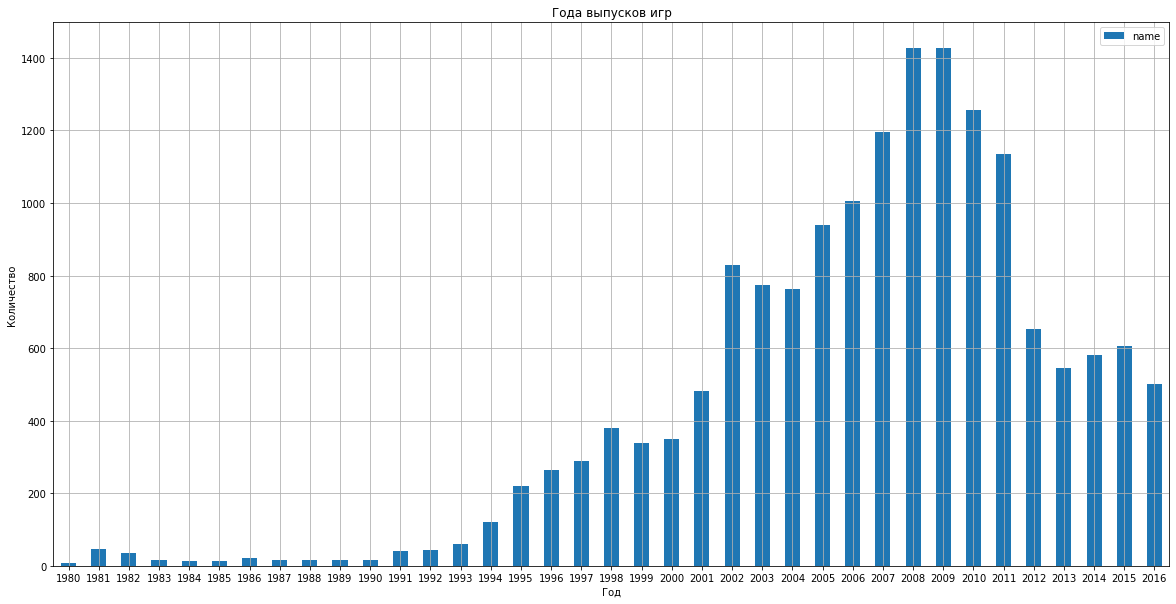

In [17]:
games_years.plot(kind='bar' , grid=True, figsize=(20, 10))

plt.title('Года выпусков игр')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.xticks(rotation = 0)
plt.show()

**Вывод:**
- На графике можно увидеть, что нам представлены выпуски игр с 1980 г. по 2016 г. 
- До 1995 года выпускалось меньше 200 игр., после выпуски стали возрастать и с 2008 г. можно наблюдать спад, но не критичный
- Считаем, что можно рассматривать данные с 1995 г.

**3.2 Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Узнаем за какой характерный срок появляются новые и исчезают старые платформы?**

In [18]:
platform_sales = data.pivot_table(index=['platform'], values='sum_sales', aggfunc='sum')
platform_sales = platform_sales.sort_values(by='sum_sales',ascending=False)
platform_sales

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


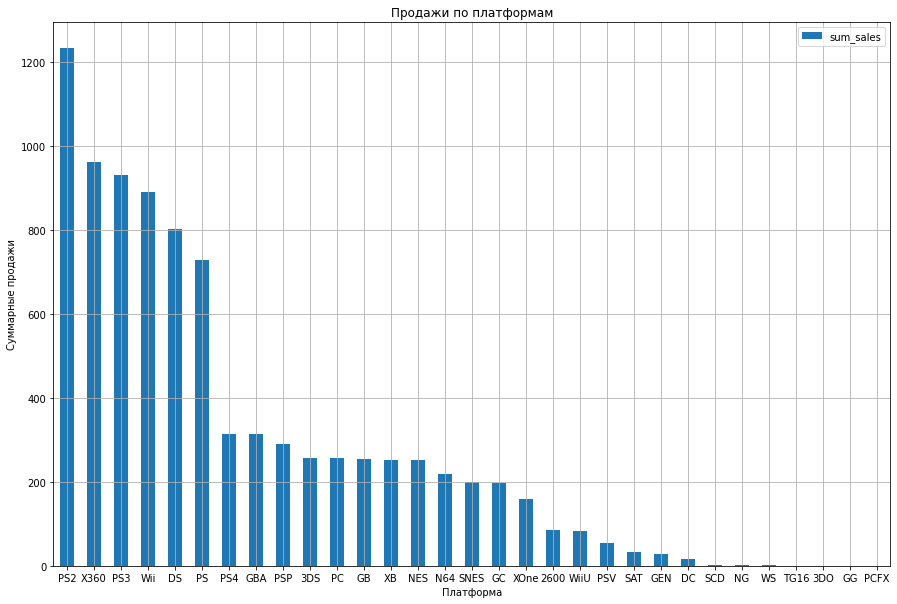

In [19]:
platform_sales.plot(kind='bar' , grid=True, figsize=(15, 10))

plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation = 0)
plt.show()

In [20]:
data.groupby('platform').agg({'sum_sales': 'sum'}).sort_values(by='sum_sales', ascending=False).head(6).index.to_list()

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [21]:
top_sales = data.query('platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS"]')
top_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,unknown,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


Выбрали шесть популярный платформ - ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

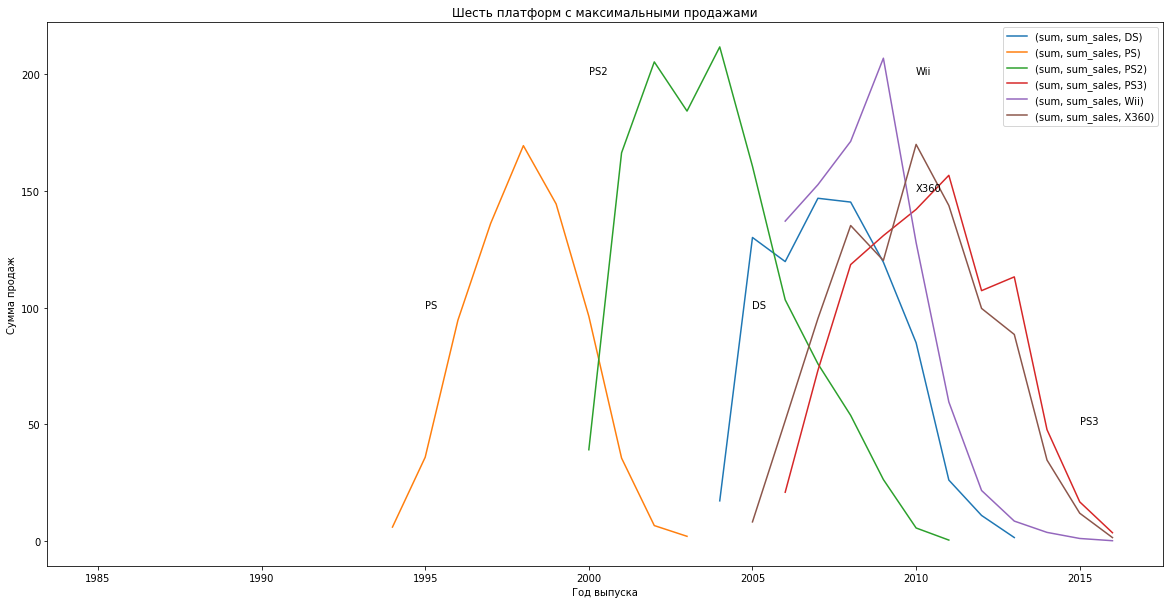

In [22]:
top_sales_platform =top_sales.pivot_table(
                                 index = ['year_of_release'], \
                                 columns = ['platform'],
                                 values = ['sum_sales'],
                                 aggfunc =  ['sum'])
top_sales_platform.plot(figsize = (20,10))
plt.title('Шесть платформ с максимальными продажами')
plt.xlabel('Год выпуска')
plt.ylabel('Сумма продаж')
plt.legend() 
plt.text (1995, 100, 'PS')
plt.text (2000, 200, 'PS2')
plt.text (2005, 100, 'DS')
plt.text (2010, 200, 'Wii')
plt.text (2010, 150, 'X360')
plt.text (2015, 50, 'PS3')
plt.show()

**Вывод:**
- На основе изучения платформ с высокими суммарными продажами, были выбраны данные платформы: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
- На графике можно увидеть резкие скачки продаж, затем падение у всех платформ
- Средний жизненный цикл платформы около 10 лет, также это можно наблюдать на графике 

**3.3 Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ**

- Возьмём данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- В результате предыдущих исследований, мы самостоятельно определили актуальный период - с 2013 года. 
Нам требуются платформы, которые начинают расти, находятся на пике и ещё действующие. Считаем, что актуальный период будет с 2013 года.

In [23]:
actual_period = data[data['year_of_release'] >= 2013]
actual_period.info()
actual_period.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  sum_sales        2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,unknown,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


Ознакомимся с данными по продажам за 4 года.

In [24]:
actual_period_sales = pd.pivot_table(actual_period, index=['platform','year_of_release'], 
                                     values='sum_sales', aggfunc = 'sum')
actual_period_sales 

sum_sales
platform year_of_release           
3DS      2013                 56.57
         2014                 43.76
         2015                 27.78
         2016                 15.14
DS       2013                  1.54
PC       2013                 12.38
         2014                 13.28
         2015                  8.52
         2016                  5.25
PS3      2013                113.25
         2014                 47.76
         2015                 16.82
         2016                  3.60
PS4      2013                 25.99
         2014                100.00
         2015                118.90
         2016                 69.25
PSP      2013                  3.14
         2014                  0.24
         2015                  0.12
PSV      2013                 10.59
         2014                 11.90
         2015                  6.25
         2016                  4.25
Wii      2013                  8.59
         2014                  3.75
         2015                  1.14
         2016                  0.18
WiiU     2013                 21.65
         2014                 22.03
         2015                 16.35
         2016                  4.60
X360     2013                 88.58
         2014                 34.74
         2015                 11.96
         2016                  1.52
XOne     2013                 18.96
         2014                 54.07
         2015                 60.14
         2016                 26.15

In [25]:
actual_platform = pd.pivot_table(actual_period_sales, index='platform', values='sum_sales', aggfunc = 'sum')
actual_platform.sort_values('sum_sales', ascending=False)

,sum_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


**Вывод:**
- В результате предыдущих исследований, мы самостоятельно определили актуальный период - с 2013 года. Нам требуются платформы, которые начинают расти, находятся на пике и ещё действующие. Считаем, что актуальный период будет с 2013 года.
- На всех платформах продажи падают кроме `PS4` и `XOne`.
- У платформ: `PS4` и `XOne` продажи тоже упали, но по сравнению с другими платформами они остаются самыми прибыльными.
- У платформ: `PS3`, `Wii`, `X360` под конец актуального периода, продажи упали до минимума.

**3.4 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.**

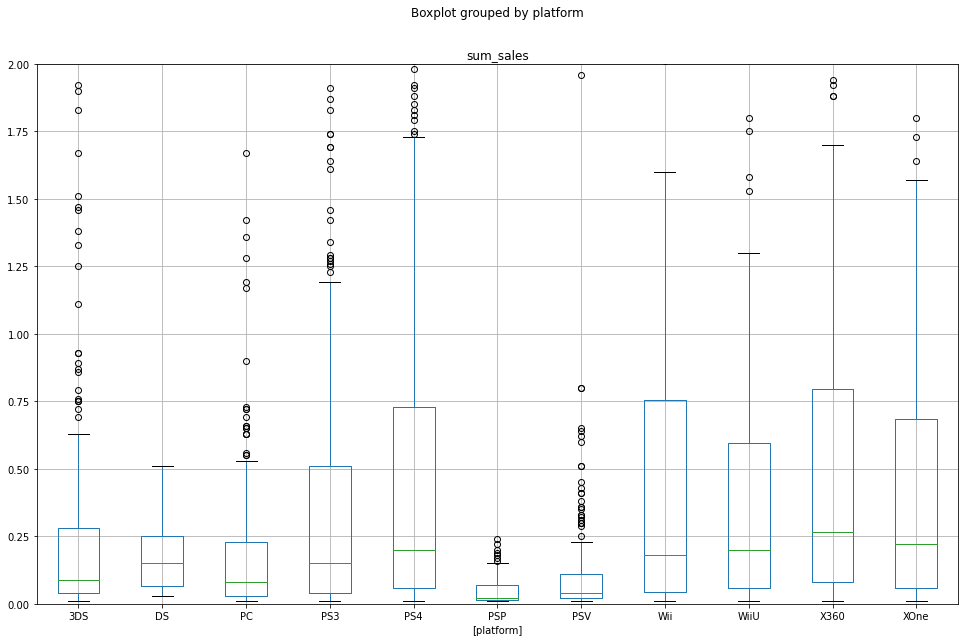

In [26]:
actual_period.boxplot(column = ['sum_sales'],by = ['platform'],figsize=(16, 10))
plt.ylim([0, 2])
plt.show()

**Вывод:**

- По данному графику можно увидеть прибыльность платформ за актуальный период
- Самой прибыльной платформой является - `PS4`
- Самая маленькая прибыль у `PSP`

**3.5 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.**

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


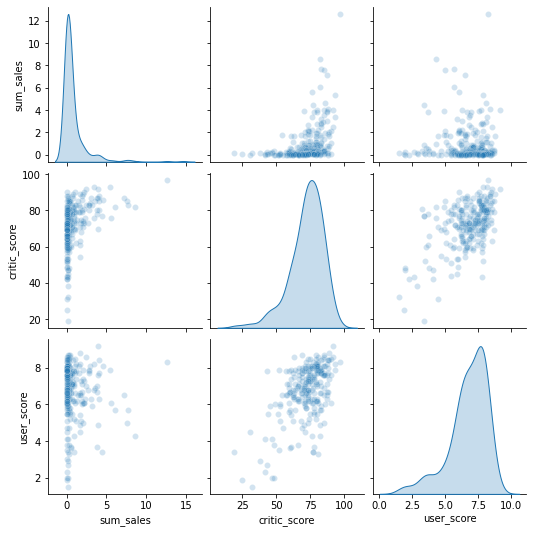

In [27]:
data_ps4 = actual_period[actual_period['platform'] == 'PS4']
data_ps4 = data_ps4.loc[:,['sum_sales', 'critic_score', 'user_score']]
display(data_ps4.corr())

sns.pairplot(data_ps4, diag_kind='kde', plot_kws={'alpha': 0.2});

**Вывод:**
Видим слабую прямую взаимосвязь, продажи не зависят от оценок критиков и пользователей. 

**Соотнесём выводы с продажами игр на других платформах.**

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


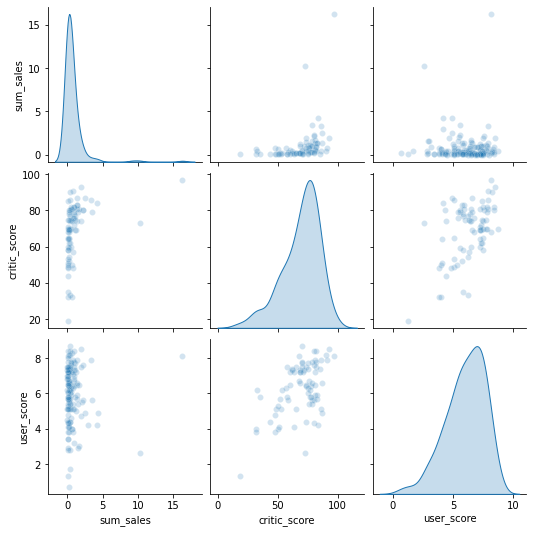

In [28]:
data_x360 = actual_period[actual_period['platform'] == 'X360']
data_x360 = data_x360.loc[:,['sum_sales', 'critic_score', 'user_score']]
display(data_x360.corr())

sns.pairplot(data_x360, diag_kind='kde', plot_kws={'alpha': 0.2});

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


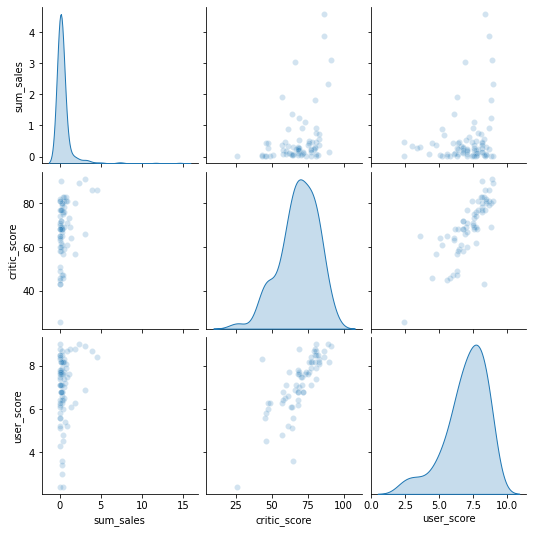

In [29]:
data_3ds = actual_period[actual_period['platform'] == '3DS']
data_3ds = data_3ds.loc[:,['sum_sales', 'critic_score', 'user_score']]
display(data_3ds.corr())

sns.pairplot(data_3ds, diag_kind='kde', plot_kws={'alpha': 0.2});

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.334285,0.002394
critic_score,0.334285,1.000000,0.599920
user_score,0.002394,0.599920,1.000000


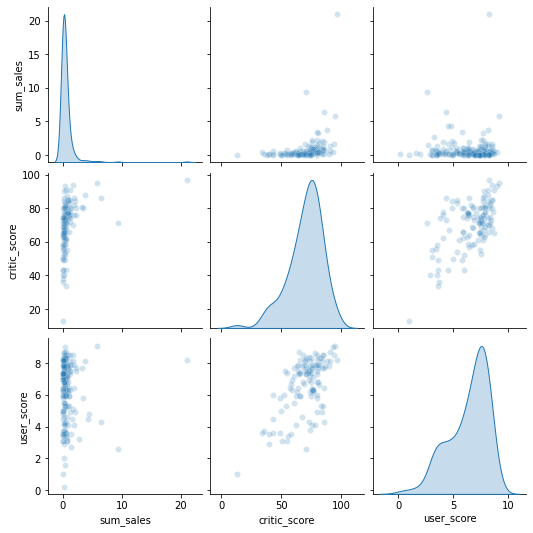

In [30]:
data_ps3 = actual_period[actual_period['platform'] == 'PS3']
data_ps3 = data_ps3.loc[:,['sum_sales', 'critic_score', 'user_score']]
display(data_ps3.corr())

sns.pairplot(data_ps3, diag_kind='kde', plot_kws={'alpha': 0.2});

**Вывод:**

Также наблюдаем слабую прямую взаимосвязь, продажи не зависят от оценок критиков и пользователей. Оценки критиков и пользователей не зависимы друг от друга. 

**Вывод:**

Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков:
- между оценками пользователей, критиков и продажами слабая связь и нелинейная

Как влияют на продажи на других платформах отзывы пользователей и критиков:
- между оценками пользователей, критиков и продажами слабая связь и нелинейная

**3.6 Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [31]:
popular_genre = actual_period.pivot_table(index='genre', values='sum_sales', aggfunc='sum')
popular_genre.sort_values(by='sum_sales', ascending=False)

,sum_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


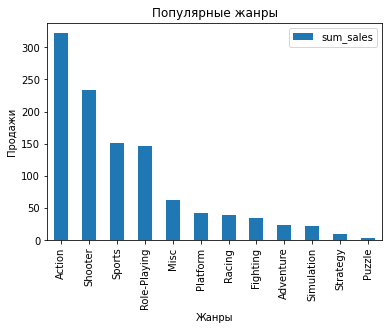

In [32]:
(
    popular_genre.sort_values(by='sum_sales', ascending=False)
    .plot(kind='bar')
)
plt.title('Популярные жанры')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

In [33]:
(actual_period
 .pivot_table(index='genre', values='sum_sales', aggfunc='median')
 .sort_values('sum_sales', ascending=False)
)

,sum_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


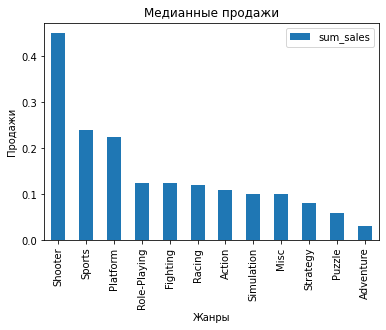

In [34]:
(
    actual_period.pivot_table(index='genre', values='sum_sales', aggfunc='median').sort_values('sum_sales', ascending=False)
    .plot(kind='bar')
)
plt.title('Медианные продажи')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

**Вывод:**

- Самые Популярные жанры -  Action, Shooter
- Большим медианным значением прибыли обладают - Shooter, Sports
- Самый не прибыльный жанр - Adventure

**Вывод по разделу 3:**

**3.1 Сколько игр выпускалось в разные годы**
- На графике можно увидеть, что нам представлены выпуски игр с 1980 г. по 2016 г. 
- До 1995 года выпускалось меньше 200 игр., после выпуски стали возрастать и с 2008 г. можно наблюдать спад, но не критичный
- Считаем, что можно рассматривать данные с 1995 г.

**3.2 Как менялись продажи по платформам**
- На основе изучения платформ с высокими суммарными продажами, были выбраны данные платформы: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
- На графике можно увидеть резкие скачки продаж, затем падение у всех платформ
- Средний жизненный цикл платформы около 10 лет, также это можно наблюдать на графике

**3.3 Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ**
- В результате предыдущих исследований, мы самостоятельно определили актуальный период - с 2013 года. Нам требуются платформы, которые начинают расти, находятся на пике и ещё действующие. Считаем, что актуальный период будет с 2013 года.
- На всех платформах продажи падают кроме `PS4` и `XOne`.
- У платформ: `PS4` и `XOne` продажи тоже упали, но по сравнению с другими платформами они остаются самыми прибыльными.
- У платформ: `PS3`, `Wii`, `X360` под конец актуального периода, продажи упали до минимума.

**3.4 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.**
- По данному графику можно увидеть прибыльность платформ за актуальный период
- Самой прибыльной платформой является - `PS4`
- Самая маленькая прибыль у `PSP`

**3.5 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы. Соотнесём выводы с продажами игр на других платформах.**

Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков:
- между оценками пользователей, критиков и продажами слабая связь и нелинейная

Как влияют на продажи на других платформах отзывы пользователей и критиков:
- между оценками пользователей, критиков и продажами слабая связь и нелинейная

**3.6 Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**
- Самые Популярные жанры -  Action, Shooter
- Большим медианным значением прибыли обладают - Shooter, Sports
- Самый не прибыльный жанр - Adventure

#### Шаг 4. Составление портрета пользователя каждого региона

**4.1 Определим для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишем различия в долях продаж.**

In [35]:
na_platform = pd.pivot_table(actual_period, index='platform', values='na_sales',
                                            aggfunc='sum').sort_values('na_sales', ascending=False).head(5)
eu_platform = pd.pivot_table(actual_period, index='platform', values='eu_sales',
                                            aggfunc='sum').sort_values('eu_sales', ascending=False).head(5)
jp_platform = pd.pivot_table(actual_period, index='platform', values='jp_sales',
                                            aggfunc='sum').sort_values('jp_sales', ascending=False).head(5)
print(na_platform)
print(eu_platform)
print(jp_platform)

          na_sales
platform          
PS4         108.74
XOne         93.12
X360         81.66
PS3          63.50
3DS          38.20
          eu_sales
platform          
PS4         141.09
PS3          67.81
XOne         51.59
X360         42.52
3DS          30.96
          jp_sales
platform          
3DS          67.81
PS3          23.35
PSV          18.59
PS4          15.96
WiiU         10.88


In [36]:
# код ревьюера

pd.pivot_table(actual_period, index='platform', values='na_sales',
                                            aggfunc='sum').sort_values('na_sales', ascending=False).head(5)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


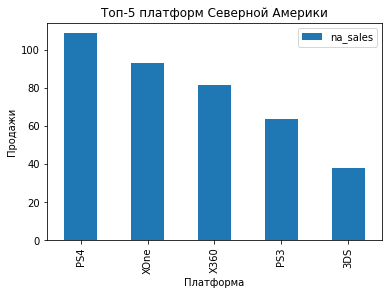

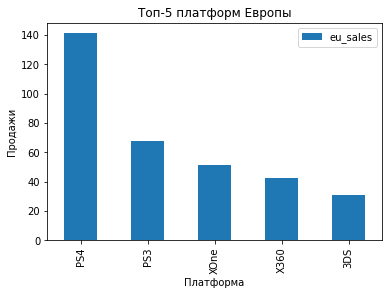

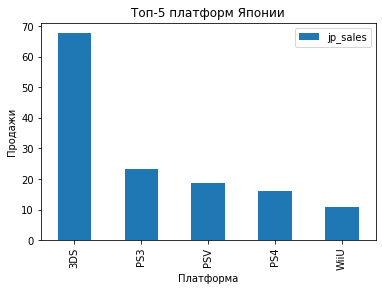

In [37]:
(
    actual_period.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5)
    .plot(kind='bar')
)
plt.title('Топ-5 платформ Северной Америки')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
(
    actual_period.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5)
    .plot(kind='bar')
)
plt.title('Топ-5 платформ Европы')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
(
    actual_period.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5)
    .plot(kind='bar')
)
plt.title('Топ-5 платформ Японии')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

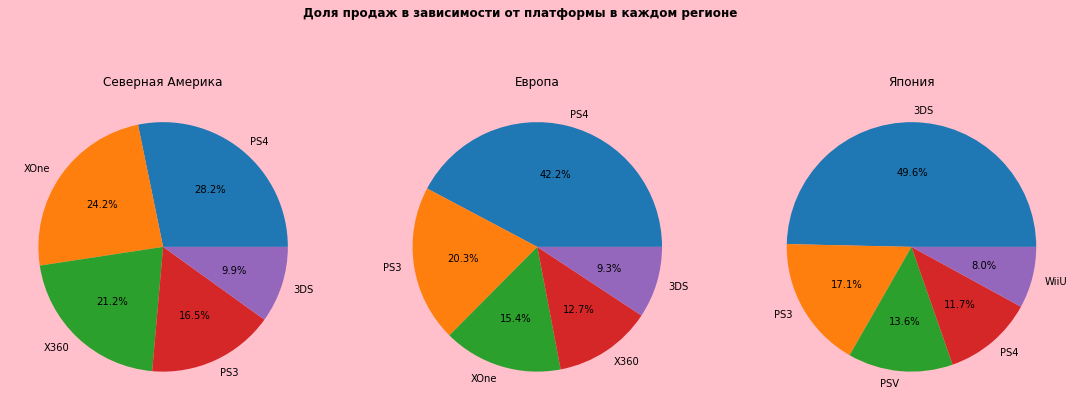

In [38]:
plt.figure(
    figsize=(19,7),
    facecolor='pink'
)
plt.suptitle(
    'Доля продаж в зависимости от платформы в каждом регионе',
    weight='bold'
)
ax1 = na_platform.reset_index()
plt.subplot(1,3,1)
plt.pie(ax1['na_sales'],labels=ax1['platform'], autopct='%1.1f%%')
plt.title(f'Северная Америка')

ax2 = eu_platform.reset_index()
plt.subplot(1,3,2)
plt.pie(ax2['eu_sales'],labels=ax2['platform'], autopct='%1.1f%%')
plt.title(f'Европа')

ax3 = jp_platform.reset_index()
plt.subplot(1,3,3)
plt.pie(ax3['jp_sales'],labels=ax3['platform'], autopct='%1.1f%%')
plt.title(f'Япония')
plt.show()

**Вывод:**

- У пользователей Северной Америки в топ-5 платформ попали - PS4, XOne, X360, 3DS, PS3. Платформа PS4 занимает 28.2% рынка.
- У пользователей Европы в топ-5 платформ попали - PS4, XOne, PS3, PC, 3DS. Платформа PS4 занимает 42.2% рынка.
- У пользователей Японии в топ-5 платформ попали - 3DS, PS4, PSV, PS3, WiiU. Платформа 3DS занимает 49.6% рынка.
- У Америки и Европы в топ-5 попали одинаковые платформы.

**4.2 Определим для пользователя каждого региона (NA, EU, JP): Самые популярные жанры (топ-5). Поясним разницу.**

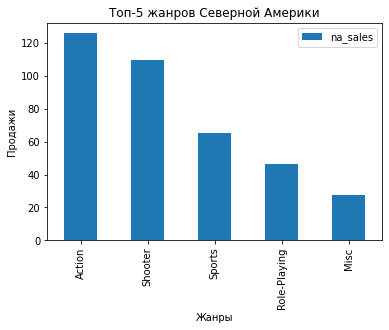

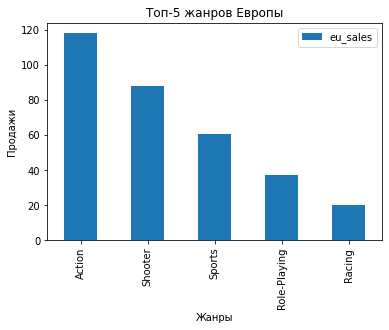

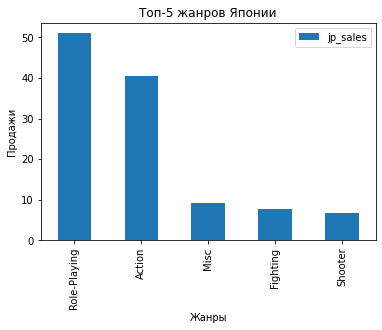

In [39]:
(
    actual_period.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5)
    .plot(kind='bar')
)
plt.title('Топ-5 жанров Северной Америки')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
(
    actual_period.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5)
    .plot(kind='bar')
)
plt.title('Топ-5 жанров Европы')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
(
    actual_period.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5)
    .plot(kind='bar')
)
plt.title('Топ-5 жанров Японии')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

In [40]:
na_genre = pd.pivot_table(actual_period, index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False).head(5)

eu_genre = pd.pivot_table(actual_period, index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False).head(5)

jp_genre = pd.pivot_table(actual_period, index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False).head(5)
print(na_genre)
print(eu_genre)
print(jp_genre)

              na_sales
genre                 
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
              eu_sales
genre                 
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
              jp_sales
genre                 
Role-Playing     51.04
Action           40.49
Misc              9.20
Fighting          7.65
Shooter           6.61


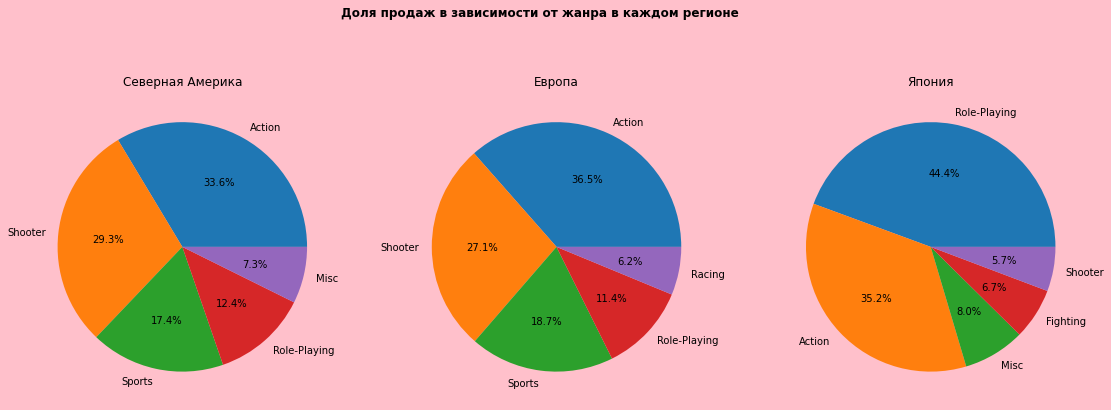

In [41]:
plt.figure(
    figsize=(19,7),
    facecolor='pink'
)
plt.suptitle(
    'Доля продаж в зависимости от жанра в каждом регионе',
    weight='bold'
)
ax1 = na_genre.reset_index()
plt.subplot(1,3,1)
plt.pie(ax1['na_sales'],labels=ax1['genre'], autopct='%1.1f%%')
plt.title(f'Северная Америка')

ax2 = eu_genre.reset_index()
plt.subplot(1,3,2)
plt.pie(ax2['eu_sales'],labels=ax2['genre'], autopct='%1.1f%%')
plt.title(f'Европа')

ax3 = jp_genre.reset_index()
plt.subplot(1,3,3)
plt.pie(ax3['jp_sales'],labels=ax3['genre'], autopct='%1.1f%%')
plt.title(f'Япония')
plt.show()

**Вывод:**

- У пользователей Северной Америки в топ-5 жанров попали - Action, Shooter, Sports, Role-Playing, Misc. Жанр Action занимает 33.6% рынка.
- У пользователей Европы в топ-5 жанров попали - Action, Shooter, Sports, Role-Playing, Racing. Жанр Action занимает 36.5% рынка.
- У пользователей Японии в топ-5 жанров попали - Role-Playing, Action, Fighting, Misc, Shooter. Жанр Role-Playing занимает 44.4% рынка.

**4.3 Определим для пользователя каждого региона (NA, EU, JP): Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

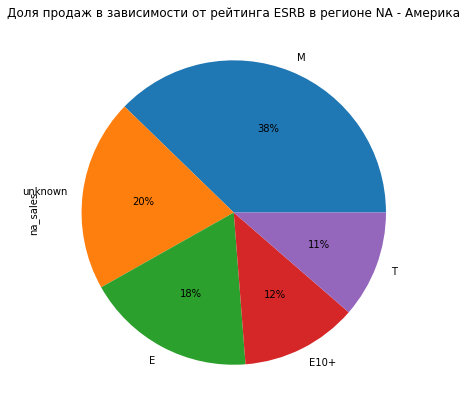

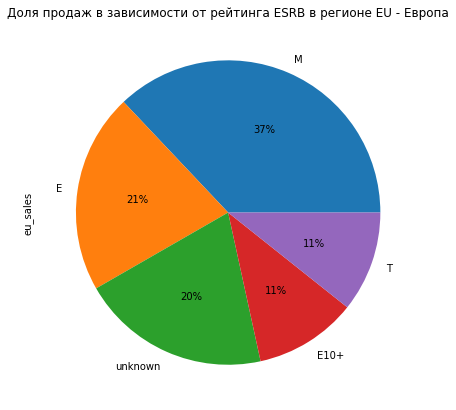

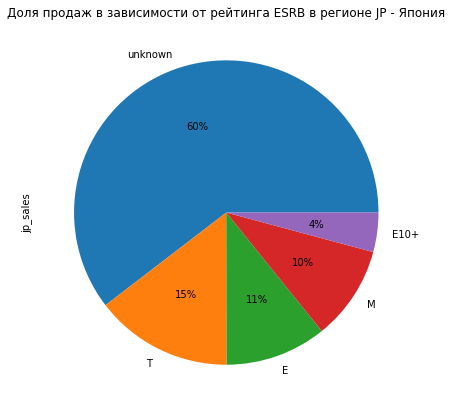

In [42]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    if region == 'na_sales':
        name = 'NA - Америка'
    elif region == 'eu_sales':
        name = 'EU - Европа'
    else:
        name = 'JP - Япония'
    (actual_period.pivot_table(index='rating', values=region, aggfunc='sum')
     .sort_values(region, ascending=False)
     .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(7, 7), legend=False, title = region)
    )
    plt.title(f'Доля продаж в зависимости от рейтинга ESRB в регионе {name}')
    plt.show()

**Вывод:**

- В Северной Америке большая часть продаж приходится на рейтинг 'M' - 38%. 
- В Европе большая часть продаж приходится на рейтинг 'M' - 37%. 
- В Японии первое место занимают игры с неуказанным рейтингом 'unknown' - 60%.

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Возможно, в Японии свой рынок игр, поэтому большая часть игр состоит из неизвестного (unknown) по рейтингу ESRB.

**Вывод по разделу 4:**

**4.1 Определим для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишем различия в долях продаж**
- У пользователей Северной Америки в топ-5 платформ попали - PS4, XOne, X360, 3DS, PS3. Платформа PS4 занимает 28.2% рынка.
- У пользователей Европы в топ-5 платформ попали - PS4, XOne, PS3, PC, 3DS. Платформа PS4 занимает 42.2% рынка.
- У пользователей Японии в топ-5 платформ попали - 3DS, PS4, PSV, PS3, WiiU. Платформа 3DS занимает 49.6% рынка.
- У Америки и Европы в топ-5 попали одинаковые платформы.

**4.2 Определим для пользователя каждого региона (NA, EU, JP): Самые популярные жанры (топ-5). Поясним разницу**
- У пользователей Северной Америки в топ-5 жанров попали - Action, Shooter, Sports, Role-Playing, Misc. Жанр Action занимает 33.6% рынка.
- У пользователей Европы в топ-5 жанров попали - Action, Shooter, Sports, Role-Playing, Racing. Жанр Action занимает 36.5% рынка.
- У пользователей Японии в топ-5 жанров попали - Role-Playing, Action, Fighting, Misc, Shooter. Жанр Role-Playing занимает 44.4% рынка.

**4.3 Определим для пользователя каждого региона (NA, EU, JP): Влияет ли рейтинг ESRB на продажи в отдельном регионе?**
- В Северной Америке большая часть продаж приходится на рейтинг 'M' - 38%. 
- В Европе большая часть продаж приходится на рейтинг 'M' - 37%. 
- В Японии первое место занимают игры с неуказанным рейтингом 'unknown' - 60%.

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Возможно, в Японии свой рынок игр, поэтому большая часть игр состоит из неизвестного (unknown) по рейтингу ESRB.

#### Шаг 5. Проверка гипотез 

**5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Выдвинем гипотезы:

- Н0: Средние пользовательские рейтинги платформ XOne и PC равны
- Н1: Средние пользовательские рейтинги платформ XOne и PC не равны

In [43]:
xone = actual_period.query('platform == "XOne" and user_score > 0')
xone['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [44]:
pc = actual_period.query('platform == "PC" and user_score > 0')
pc['user_score'].describe()

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

In [45]:
alpha = 0.05

results = st.ttest_ind(
    xone['user_score'], 
    pc['user_score'],
    equal_var=False, 
    alternative='two-sided') 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


**Вывод:**
Не получилось отвергнуть нулевую гипотезу. Можно сделать вывод о том, что с большой долей вероятности средние пользовательские рейтинги платформ Xbox One и PC не имеют статистически значимых отличий.

- В разделе 5.1 гипотеза является - гипотезой о равенстве средних двух генеральных совокупностей. Соответственно, использовали t-тест.
- Нам необходимо было проверить - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (они либо равно, либо не равны). Так как данная гипотеза является двусторонней, был использован аргумент - 'two-sided':
 - Нулевая гипоптеза: Средние пользовательские рейтинги платформ XOne и PC равны
 - Альтернативная гипотеза: Средние пользовательские рейтинги платформ XOne и PC не равны


**5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

Выдвинем гипотезы:

- Н0: Средние пользовательские рейтинги жанров Action и Sports равны
- Н1: Средние пользовательские рейтинги жанров Action и Sports не равны

In [46]:
action = actual_period.query('genre == "Action" and user_score > 0')
action['user_score'].describe()

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [47]:
sports = actual_period.query('genre == "Sports" and user_score > 0')
sports['user_score'].describe()

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

In [48]:
alpha = 0.05

results = st.ttest_ind(
    action['user_score'], 
    sports['user_score'],
    equal_var=False,
    alternative='two-sided') 

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод:**
Нулевая гипотеза отвергнута. Можно сделать вывод о том, что с большой долей вероятности средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- В разделе 5.2 гипотеза является - гипотезой о равенстве средних двух генеральных совокупностей. Соответственно, использовали t-тест.
- Нам необходимо было проверить - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные (они либо равно, либо не равны). Так как данная гипотеза является двусторонней, был использован аргумент - 'two-sided':
 - Нулевая гипоптеза: Средние пользовательские рейтинги жанров Action и Sports равны
 - Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны


**Вывод по разделу 5:**

- 5.1 Не получилось отвергнуть нулевую гипотезу. Можно сделать вывод о том, что с большой долей вероятности средние пользовательские рейтинги платформ Xbox One и PC не имеют статистически значимых отличий.
 - В разделе 5.1 гипотеза является - гипотезой о равенстве средних двух генеральных совокупностей. Соответственно, использовали t-тест.
 - Нам необходимо было проверить - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (они либо равно, либо не равны). Так как данная гипотеза является двусторонней, был использован аргумент - 'two-sided':
   - Нулевая гипоптеза: Средние пользовательские рейтинги платформ XOne и PC равны
   - Альтернативная гипотеза: Средние пользовательские рейтинги платформ XOne и PC не равны

- 5.2 Нулевая гипотеза отвергнута. Можно сделать вывод о том, что с большой долей вероятности средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 - В разделе 5.2 гипотеза является - гипотезой о равенстве средних двух генеральных совокупностей. Соответственно, использовали t-тест.
 - Нам необходимо было проверить - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные (они либо равно, либо не равны). Так как данная гипотеза является двусторонней, был использован аргумент - 'two-sided':
   - Нулевая гипоптеза: Средние пользовательские рейтинги жанров Action и Sports равны
   - Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны


#### Шаг 6. Общий вывод по всей работе

**1. Загрузка данных**

- В таблице 16715 строк и 11 колонок
- В шести колонках имеются пропуски в данных (Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating)
- Названия всех колонок имеют нарушение стилей
- Ряд колонок имеет некорретктный тип (Year_of_Release, Critic_Score, User_Score)


**2.Предоработка данных**

- Заменили названия столбцов (привели к нижнему регистру).
- Проверили и удалили дубликаты.
- Обработали пропуски:
- Обработали пропуски:
  - Пропусков в `name` и `genre` мало, поэтому удалили их. Возможно они появились в связи с оошибками в сборе данных, техническими проблемами.
  - В `year_of_release` пропусков мало и считаю, что можно их удалить. Возможно, пропуски появились из-за того, что не указан год выпуска на самой игре, игра еще не вышла, либо произошла ошибка при сборе данных.
  - В `critic_score` замена на медиану может исказить исходные данные. Считаю, что оценку критиков лучше не заменять и оставить как есть. Возможно, пропуски появились из-за неверного сбора данных, технических проблемах или критики пожелали не разглашать свои оценки.
  - В `user_score` замена на медиану может исказить исходные данные. Считаю, что оценку пользователей лучше не заменять и оставить как есть. Аббревиатура tbd (To Be Determined) переводится - Будет определено. Скорее всего пользователи еще не дали своих оценок. Так как оценок пользователей нет, аббревиатуру 'tbd' на nan. Возможно, пропуски появились из-за неверного сбора данных, технических проблемах или пользователи пожелали не разглашать свои оценки.
  - В `rating` считаю, что неизвестную возрастную категорию можно заменить на 'unknown'(неизвестно). Возможно, пропуски появились из-за неверного сбора данных, технических проблемах.
- Преобразовали данные в нужные типы. 
  - year_of_release преобразовали в тип int, так как даны целые числа.
  - user_score преобразовали в тип float, так как присутствует значение - nan.
- Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец - `sum_sales`.


**3. Исследовательский анализ данных:**

**3.1 Сколько игр выпускалось в разные годы**
- На графике можно увидеть, что нам представлены выпуски игр с 1980 г. по 2016 г. 
- До 1995 года выпускалось меньше 200 игр., после выпуски стали возрастать и с 2008 г. можно наблюдать спад, но не критичный
- Считаем, что можно рассматривать данные с 1995 г.

**3.2 Как менялись продажи по платформам**
- На основе изучения платформ с высокими суммарными продажами, были выбраны данные платформы: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
- На графике можно увидеть резкие скачки продаж, затем падение у всех платформ
- Средний жизненный цикл платформы около 10 лет, также это можно наблюдать на графике

**3.3 Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ**
- В результате предыдущих исследований, мы самостоятельно определили актуальный период - с 2013 года. Нам требуются платформы, которые начинают расти, находятся на пике и ещё действующие. Считаем, что актуальный период будет с 2013 года.
- На всех платформах продажи падают кроме `PS4` и `XOne`.
- У платформ: `PS4` и `XOne` продажи тоже упали, но по сравнению с другими платформами они остаются самыми прибыльными.
- У платформ: `PS3`, `Wii`, `X360` под конец актуального периода, продажи упали до минимума.

**3.4 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.**
- По данному графику можно увидеть прибыльность платформ за актуальный период
- Самой прибыльной платформой является - `PS4`
- Самая маленькая прибыль у `PSP`

**3.5 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы. Соотнесём выводы с продажами игр на других платформах.**

Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков:
- между оценками пользователей, критиков и продажами слабая связь и нелинейная

Как влияют на продажи на других платформах отзывы пользователей и критиков:
- между оценками пользователей, критиков и продажами слабая связь и нелинейная

**3.6 Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**
- Самые Популярные жанры -  Action, Shooter
- Большим медианным значением прибыли обладают - Shooter, Sports
- Самый не прибыльный жанр - Adventure



**4. Cоставление портрета пользователя каждого региона**

**4.1 Определим для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишем различия в долях продаж**
- У пользователей Северной Америки в топ-5 платформ попали - PS4, XOne, X360, 3DS, PS3. Платформа PS4 занимает 28.2% рынка.
- У пользователей Европы в топ-5 платформ попали - PS4, XOne, PS3, PC, 3DS. Платформа PS4 занимает 42.2% рынка.
- У пользователей Японии в топ-5 платформ попали - 3DS, PS4, PSV, PS3, WiiU. Платформа 3DS занимает 49.6% рынка.
- У Америки и Европы в топ-5 попали одинаковые платформы.

**4.2 Определим для пользователя каждого региона (NA, EU, JP): Самые популярные жанры (топ-5). Поясним разницу**
- У пользователей Северной Америки в топ-5 жанров попали - Action, Shooter, Sports, Role-Playing, Misc. Жанр Action занимает 33.6% рынка.
- У пользователей Европы в топ-5 жанров попали - Action, Shooter, Sports, Role-Playing, Racing. Жанр Action занимает 36.5% рынка.
- У пользователей Японии в топ-5 жанров попали - Role-Playing, Action, Fighting, Misc, Shooter. Жанр Role-Playing занимает 44.4% рынка.

**4.3 Определим для пользователя каждого региона (NA, EU, JP): Влияет ли рейтинг ESRB на продажи в отдельном регионе?**
- В Северной Америке большая часть продаж приходится на рейтинг 'M' - 38%. 
- В Европе большая часть продаж приходится на рейтинг 'M' - 37%. 
- В Японии первое место занимают игры с неуказанным рейтингом 'unknown' - 60%.

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Возможно, в Японии свой рынок игр, поэтому большая часть игр состоит из неизвестного (unknown) по рейтингу ESRB.


**5. Проверка гипотез**
- 5.1 Не получилось отвергнуть нулевую гипотезу. Можно сделать вывод о том, что с большой долей вероятности средние пользовательские рейтинги платформ Xbox One и PC не имеют статистически значимых отличий.
 - В разделе 5.1 гипотеза является - гипотезой о равенстве средних двух генеральных совокупностей. Соответственно, использовали  t-тест.
 - Нам необходимо было проверить - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (они либо равно, либо не равны). Так как данная гипотеза является двусторонней, был использован аргумент - 'two-sided':
   - Нулевая гипоптеза: Средние пользовательские рейтинги платформ XOne и PC равны
   - Альтернативная гипотеза: Средние пользовательские рейтинги платформ XOne и PC не равны

- 5.2 Нулевая гипотеза отвергнута. Можно сделать вывод о том, что с большой долей вероятности средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- В разделе 5.2 гипотеза является - гипотезой о равенстве средних двух генеральных совокупностей. Соответственно, использовали t-тест.
 - Нам необходимо было проверить - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные (они либо равно, либо не равны). Так как данная гипотеза является двусторонней, был использован аргумент - 'two-sided':
   - Нулевая гипоптеза: Средние пользовательские рейтинги жанров Action и Sports равны
   - Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны
**Рекомендации отделу маркетинга для проведения рекламной кампании в 2017 году:**
  - Следует обратить внимание на платформу PS4, жанры Shooter, Sports и Action, с рейтингом 'M'.